In [1]:
pwd

'/Users/surajpawar/Desktop/Recurrent Neural Networks'

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

In [14]:
df = pd.read_csv("/Users/surajpawar/Desktop/Recurrent Neural Networks/wine-reviews.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [17]:
df = pd.read_csv("/Users/surajpawar/Desktop/Recurrent Neural Networks/wine-reviews.csv", usecols = 
                ["country", "description", "points", "price", "variety", "winery"])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [18]:
df = df.dropna(subset=["description", "points"])
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


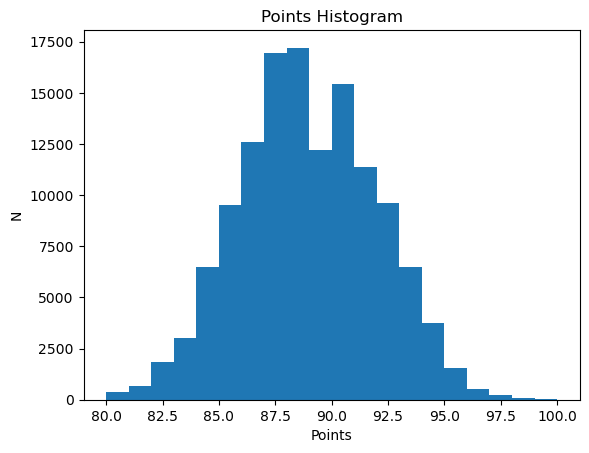

In [19]:
plt.hist(df.points,bins=20)
plt.title("Points Histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [20]:
df["label"] = (df.points >= 90).astype(int)

df = df[["description", "label"]]

In [21]:
df.head()

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [22]:
df.tail()

,description,label
129966,Notes of honeysuckle and cantaloupe sweeten th...,1
129967,Citation is given as much as a decade of bottl...,1
129968,Well-drained gravel soil gives this wine its c...,1
129969,"A dry style of Pinot Gris, this is crisp with ...",1
129970,"Big, rich and off-dry, this is powered by inte...",1


In [23]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [24]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [25]:
def df_to_dataset(dataframe, shuffle = True, batch_size = 1024):
    df = dataframe.copy()
    labels = df.pop("label")
    df = df["description"]
    ds = tf.data.Dataset.from_tensor_slices((df, labels))
    if shuffle: 
        ds = ds.shuffle(buffer_size = len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

In [26]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

In [27]:
list(train_data)[0]

2023-08-06 14:22:11.136789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [103976]
	 [[{{node Placeholder/_0}}]]
2023-08-06 14:22:11.137769: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [103976]
	 [[{{node Placeholder/_0}}]]


(<tf.Tensor: shape=(1024,), dtype=string, numpy=
 array([b'Pio Cesare and the 2007 vintage marry beautifully to produce a layered, opulent, textured, rich wine that is bursting with zesty red fruit, sassy spice, leather and toasted espresso bean. What really sets this wine apart is the dense smoothness of its texture. Save this bottle in your cellar 10 years or more.',
        b'Mild raspberry and tomato aromas precede a grabby-feeling wine with sandpaper tannins and flavors of medicinal plum and tomato. It comes across loud but raw and unrefined.',
        b"The nose is a little closed, but there's a lot to like about this Pinot, particularly its gravelly tannins. Blackberry, black plum and metallic-mineral flavors are lovely, but really, it's all about the texture.",
        ...,
        b'Solid and firmly tannic, this is a wine with forward red-fruit flavors, a dry core and dense texture. The structure of this balanced wine along with its concentration promise aging. Drink from 2016

In [28]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype = tf.string, trainable=True)

In [30]:
hub_layer(list(train_data)[0][0])

2023-08-06 14:31:16.947463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'sentences' with dtype string and shape [?]
	 [[{{node sentences}}]]


<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.6011481 , -0.02185778, -0.1746034 , ...,  0.03822031,
        -0.0742669 ,  0.14486547],
       [ 0.29386508, -0.00868974,  0.00423318, ..., -0.00897721,
        -0.2823386 , -0.05229549],
       [ 0.32176745, -0.07823408, -0.06866995, ...,  0.12820618,
        -0.23225659,  0.1139859 ],
       ...,
       [ 0.6125676 , -0.00835495,  0.04515097, ..., -0.21763694,
        -0.18096618,  0.21267666],
       [ 0.17438337, -0.00474429, -0.02301063, ..., -0.01596769,
        -0.11979079,  0.11572903],
       [ 0.24127978, -0.19590014,  0.09679711, ..., -0.04554008,
        -0.12952965, -0.09441094]], dtype=float32)>

In [31]:
encoder = tf.keras.layers.TextVectorization(max_tokens=2000)
encoder.adapt(train_data.map(lambda text, label: text))

2023-08-06 14:39:13.925537: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [103976]
	 [[{{node Placeholder/_1}}]]
2023-08-06 14:39:13.926127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [103976]
	 [[{{node Placeholder/_1}}]]


In [32]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that'], dtype='<U17')

In [34]:
model = tf.keras.Sequential([
    encoder, 
    tf.keras.layers.Embedding(
        input_dim = len(encoder.get_vocabulary()),
        output_dim = 32,
        mask_zero = True
        ),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(16, activation ="relu"),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [35]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             loss = tf.keras.losses.BinaryCrossentropy(),
             metrics = ["accuracy"]
             )

In [36]:
model.evaluate(train_data)
model.evaluate(valid_data)

 2/13 [===>..........................] - ETA: 0s - loss: 0.6928 - accuracy: 0.5537

2023-08-06 14:50:44.496856: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12997]
	 [[{{node Placeholder/_0}}]]
2023-08-06 14:50:44.497171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype int64 and shape [12997]
	 [[{{node Placeholder/_1}}]]


13/13 [==============================] - 1s 76ms/step - loss: 0.6928 - accuracy: 0.5431


[0.6927971839904785, 0.543125331401825]

In [37]:
history = model.fit(train_data, epochs = 5, validation_data = valid_data)

Epoch 1/5
102/102 [==============================] - 27s 224ms/step - loss: 0.5382 - accuracy: 0.7237 - val_loss: 0.3829 - val_accuracy: 0.8311
Epoch 2/5
102/102 [==============================] - 23s 227ms/step - loss: 0.3838 - accuracy: 0.8338 - val_loss: 0.3596 - val_accuracy: 0.8379
Epoch 3/5
102/102 [==============================] - 34s 334ms/step - loss: 0.3596 - accuracy: 0.8441 - val_loss: 0.3545 - val_accuracy: 0.8386
Epoch 4/5
102/102 [==============================] - 43s 422ms/step - loss: 0.3504 - accuracy: 0.8473 - val_loss: 0.3556 - val_accuracy: 0.8374
Epoch 5/5
102/102 [==============================] - 35s 341ms/step - loss: 0.3446 - accuracy: 0.8505 - val_loss: 0.3532 - val_accuracy: 0.8380


In [38]:
model.evaluate(test_data)

 1/13 [=>............................] - ETA: 2s - loss: 0.3301 - accuracy: 0.8594

2023-08-06 14:55:09.589727: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12998]
	 [[{{node Placeholder/_0}}]]
2023-08-06 14:55:09.590200: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [12998]
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 1s 101ms/step - loss: 0.3491 - accuracy: 0.8418


[0.3490699231624603, 0.8418217897415161]